[-0.2980448  -0.21674549]
The following conditions were not trained, rain was the expected output, predicted was the output, in my testing they almost always matched:
    temp  humid  rain  predicted
0   0.15   0.20     0          0
11  0.70   0.68     1          1
13  0.82   0.75     1          1
15  0.85   0.78     1          1
18  0.92   0.85     1          1


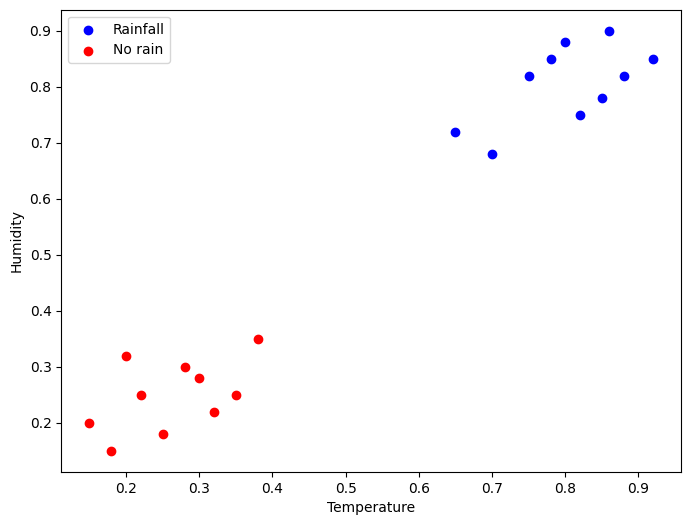

In [68]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import math

data = pandas.read_csv("Data/WeatherData_Q3.csv")

plt.figure(figsize=(8, 6))


frame = pandas.DataFrame(data)
rain = frame.loc[frame["rain"]==1]
nah = frame.loc[frame["rain"]==0]
plt.scatter(rain.temp, rain.humid,color='blue',label='Rainfall')
plt.scatter(nah.temp, nah.humid,color='red',label='No rain')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend()

#random weights/bias to start
w = np.random.rand(2)# between 0 and 1
w[0]-=.5
w[1]-=.5 # makes it between -.5 and .5
print(w)
b = np.random.rand(1)

train = frame.sample(frac=0.75)#for 20 data points this is 15 for one and 5 left behind
test = frame.drop(train.index)
x = frame[['temp',"humid"]].values # array of temp and humid values.
y = frame[['rain']].values # output or predictor



def perceive(meow):
    return 1 if meow >= 0 else 0
times = 10 # number of times to run through the data
# the data is so clearly distinct i set it to only run once so there may be an occasional error othewise its beautiful. Set to ten for like perfection
rate = .1
for _ in range(times):
    for i in range(len(x)):# uses every data set
        woof = np.dot(w, x[i])+b
        #print(woof, perceive(woof))
        y_pred = perceive(woof)
        error = y[i] - y_pred

        w += rate*error*x[i]
        b+= rate*error



test['predicted'] = test.apply(lambda dota: perceive(np.dot(w, [dota['temp'], dota['humid']]) + b), axis=1)
print("The following conditions were not trained, rain was the expected output, predicted was the output, in my testing they almost always matched:")
print(test)
